169009152/169001437 [==============================] - 4s 0us/step
Epoch 1/100
1563/1563 [==============================] - 50s 32ms/step - loss: 4.3012 - accuracy: 0.0308 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 5.0395 - val_accuracy: 0.0354 - val_precision: 0.3333 - val_recall: 1.0000e-04
Epoch 2/100
1563/1563 [==============================] - 50s 32ms/step - loss: 4.1408 - accuracy: 0.0400 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 4.8605 - val_accuracy: 0.0265 - val_precision: 0.3750 - val_recall: 3.0000e-04
Epoch 3/100
1563/1563 [==============================] - 51s 32ms/step - loss: 3.9969 - accuracy: 0.0546 - precision: 0.2222 - recall: 4.0000e-05 - val_loss: 3.9113 - val_accuracy: 0.0585 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/100
1563/1563 [==============================] - 50s 32ms/step - loss: 3.8786 - accuracy: 0.0665 - precision: 0.5455 - recall: 2.4000e-04 - val_loss: 3.7809 - val_accuracy: 0.0791 - val_precision: 0.500

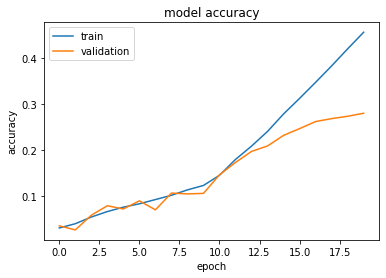

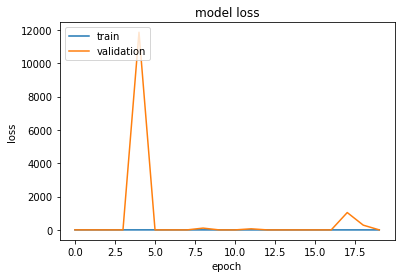

In [1]:
import tensorflow as tf
from keras.datasets import cifar100
import numpy as np
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten, BatchNormalization,Dropout
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import SGD
from keras.metrics import Precision,Recall
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import regularizers
from keras.layers import Dense, Dropout, Activation, Flatten
from keras import optimizers

(x_train,y_train),(x_test,y_test)=cifar100.load_data()


es= EarlyStopping(monitor='val_loss', patience=4)
mc= ModelCheckpoint(filepath='VGG16_ADAM_NoRegularization.h5', monitor='val_loss', save_best_only=True)

y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

mean = x_train.mean()
std= x_train.std()
x_train=(x_train-mean)/std

mean = x_test.mean()
std= x_test.std()
x_test=(x_test-mean)/std

model = Sequential()
x_shape=[32,32,3]

model.add(Conv2D(64, (3, 3), padding='same',
                         input_shape=x_shape))
model.add(Activation('relu'))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), padding='same'))
model.add(Activation('relu'))

model.add(Conv2D(256, (3, 3), padding='same'))
model.add(Activation('relu'))

model.add(Conv2D(256, (3, 3), padding='same'))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(512, (3, 3), padding='same'))
model.add(Activation('relu'))

model.add(Conv2D(512, (3, 3), padding='same'))
model.add(Activation('relu'))


model.add(Conv2D(512, (3, 3), padding='same'))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(512, (3, 3), padding='same'))
model.add(Activation('relu'))


model.add(Conv2D(512, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())


model.add(Conv2D(512, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))

model.add(Dense(100))
model.add(Activation('softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy',Precision(),Recall()])
history=model.fit(x=x_train,y=y_train,epochs=100, validation_data=(x_test,y_test), callbacks=[es,mc])

from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [2]:
import keras 

(x_train,y_train),(x_test,y_test)=cifar100.load_data()
y_test=to_categorical(y_test)

mean = x_test.mean()
std= x_test.std()
x_test=(x_test-mean)/std


best_model= keras.models.load_model('VGG16_ADAM_NoRegularization.h5')
_, acc,precision,recall = best_model.evaluate(x_test, y_test)

print("Accuracy: "+str(acc*100)+"%")
print("Precision: "+str(precision*100)+"%")
print("Recall: "+str(recall*100)+"%")

313/313 [==============================] - 3s 10ms/step - loss: 2.9842 - accuracy: 0.2470 - precision: 0.6488 - recall: 0.0994
Accuracy: 24.699999392032623%
Precision: 64.88250494003296%
Recall: 9.939999878406525%
